In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [4]:
data=pd.read_csv('titanic.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

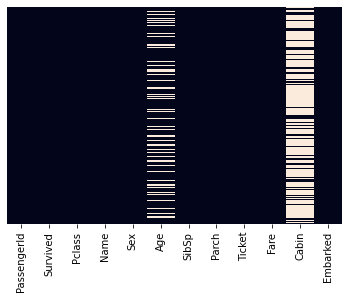

In [6]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

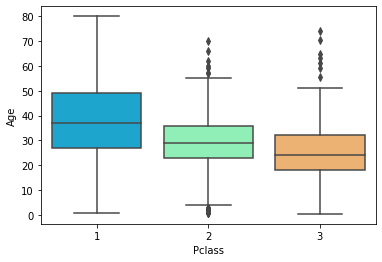

In [7]:
sns.boxplot(data=data,x='Pclass',y='Age',palette='rainbow')

In [8]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else :
            return 24
    else:
        return Age

In [9]:

data['Age']=data[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

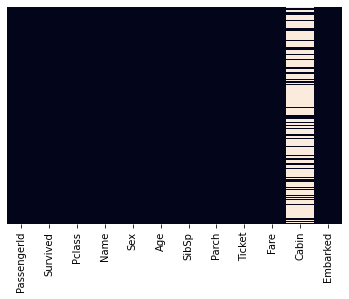

In [10]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

In [11]:
data.drop('Cabin',axis=1,inplace=True)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [13]:
data.dropna(inplace=True)

In [14]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Embarked']=le.fit_transform(data['Embarked'])
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,2
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,0


In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Sex']=le.fit_transform(data['Sex'])
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,24.0,1,2,W./C. 6607,23.4500,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,0


In [41]:
x=data.drop(['Name','Ticket','Survived'],axis=1)
x.values

array([[  1.    ,   3.    ,   1.    , ...,   0.    ,   7.25  ,   2.    ],
       [  2.    ,   1.    ,   0.    , ...,   0.    ,  71.2833,   0.    ],
       [  3.    ,   3.    ,   0.    , ...,   0.    ,   7.925 ,   2.    ],
       ...,
       [889.    ,   3.    ,   0.    , ...,   2.    ,  23.45  ,   2.    ],
       [890.    ,   1.    ,   1.    , ...,   0.    ,  30.    ,   0.    ],
       [891.    ,   3.    ,   1.    , ...,   0.    ,   7.75  ,   1.    ]])

In [42]:
y=data['Survived']
y.values

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,

In [43]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.73250451,  0.82520863,  0.73534203, ..., -0.47432585,
        -0.50023975,  0.58683958],
       [-1.72861124, -1.57221121, -1.35991138, ..., -0.47432585,
         0.78894661, -1.93955453],
       [-1.72471797,  0.82520863, -1.35991138, ..., -0.47432585,
        -0.48664993,  0.58683958],
       ...,
       [ 1.72471797,  0.82520863, -1.35991138, ...,  2.00611934,
        -0.17408416,  0.58683958],
       [ 1.72861124, -1.57221121,  0.73534203, ..., -0.47432585,
        -0.0422126 , -1.93955453],
       [ 1.73250451,  0.82520863,  0.73534203, ..., -0.47432585,
        -0.49017322, -0.67635748]])

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=4)

In [45]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [46]:
y_pred=model.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [47]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm


array([[148,  30],
       [ 33,  83]], dtype=int64)

In [48]:
from sklearn import metrics

print(metrics.accuracy_score(y_test,y_pred))

0.7857142857142857


# Task -2(data-adult)

In [50]:
data2=pd.read_csv('adult.csv')
data2

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [51]:
data2.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [53]:
editted=data2.drop(['fnlwgt','marital-status','race','capital-gain','capital-loss','relationship'],axis=1)
editted

,age,workclass,education,educational-num,occupation,gender,hours-per-week,native-country,income
0,25,Private,11th,7,Machine-op-inspct,Male,40,United-States,<=50K
1,38,Private,HS-grad,9,Farming-fishing,Male,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Protective-serv,Male,40,United-States,>50K
3,44,Private,Some-college,10,Machine-op-inspct,Male,40,United-States,>50K
4,18,?,Some-college,10,?,Female,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Tech-support,Female,38,United-States,<=50K
48838,40,Private,HS-grad,9,Machine-op-inspct,Male,40,United-States,>50K
48839,58,Private,HS-grad,9,Adm-clerical,Female,40,United-States,<=50K
48840,22,Private,HS-grad,9,Adm-clerical,Male,20,United-States,<=50K


In [55]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
editted['workclass']=le.fit_transform(editted['workclass'])
editted

,age,workclass,education,educational-num,occupation,gender,hours-per-week,native-country,income
0,25,4,11th,7,Machine-op-inspct,Male,40,United-States,<=50K
1,38,4,HS-grad,9,Farming-fishing,Male,50,United-States,<=50K
2,28,2,Assoc-acdm,12,Protective-serv,Male,40,United-States,>50K
3,44,4,Some-college,10,Machine-op-inspct,Male,40,United-States,>50K
4,18,0,Some-college,10,?,Female,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
48837,27,4,Assoc-acdm,12,Tech-support,Female,38,United-States,<=50K
48838,40,4,HS-grad,9,Machine-op-inspct,Male,40,United-States,>50K
48839,58,4,HS-grad,9,Adm-clerical,Female,40,United-States,<=50K
48840,22,4,HS-grad,9,Adm-clerical,Male,20,United-States,<=50K


In [56]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
editted['education']=le.fit_transform(editted['education'])
editted

,age,workclass,education,educational-num,occupation,gender,hours-per-week,native-country,income
0,25,4,1,7,Machine-op-inspct,Male,40,United-States,<=50K
1,38,4,11,9,Farming-fishing,Male,50,United-States,<=50K
2,28,2,7,12,Protective-serv,Male,40,United-States,>50K
3,44,4,15,10,Machine-op-inspct,Male,40,United-States,>50K
4,18,0,15,10,?,Female,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
48837,27,4,7,12,Tech-support,Female,38,United-States,<=50K
48838,40,4,11,9,Machine-op-inspct,Male,40,United-States,>50K
48839,58,4,11,9,Adm-clerical,Female,40,United-States,<=50K
48840,22,4,11,9,Adm-clerical,Male,20,United-States,<=50K


In [57]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
editted['occupation']=le.fit_transform(editted['occupation'])
editted

,age,workclass,education,educational-num,occupation,gender,hours-per-week,native-country,income
0,25,4,1,7,7,Male,40,United-States,<=50K
1,38,4,11,9,5,Male,50,United-States,<=50K
2,28,2,7,12,11,Male,40,United-States,>50K
3,44,4,15,10,7,Male,40,United-States,>50K
4,18,0,15,10,0,Female,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
48837,27,4,7,12,13,Female,38,United-States,<=50K
48838,40,4,11,9,7,Male,40,United-States,>50K
48839,58,4,11,9,1,Female,40,United-States,<=50K
48840,22,4,11,9,1,Male,20,United-States,<=50K


In [58]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
editted['gender']=le.fit_transform(editted['gender'])
editted

,age,workclass,education,educational-num,occupation,gender,hours-per-week,native-country,income
0,25,4,1,7,7,1,40,United-States,<=50K
1,38,4,11,9,5,1,50,United-States,<=50K
2,28,2,7,12,11,1,40,United-States,>50K
3,44,4,15,10,7,1,40,United-States,>50K
4,18,0,15,10,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
48837,27,4,7,12,13,0,38,United-States,<=50K
48838,40,4,11,9,7,1,40,United-States,>50K
48839,58,4,11,9,1,0,40,United-States,<=50K
48840,22,4,11,9,1,1,20,United-States,<=50K


In [59]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
editted['native-country']=le.fit_transform(editted['native-country'])
editted

,age,workclass,education,educational-num,occupation,gender,hours-per-week,native-country,income
0,25,4,1,7,7,1,40,39,<=50K
1,38,4,11,9,5,1,50,39,<=50K
2,28,2,7,12,11,1,40,39,>50K
3,44,4,15,10,7,1,40,39,>50K
4,18,0,15,10,0,0,30,39,<=50K
...,...,...,...,...,...,...,...,...,...
48837,27,4,7,12,13,0,38,39,<=50K
48838,40,4,11,9,7,1,40,39,>50K
48839,58,4,11,9,1,0,40,39,<=50K
48840,22,4,11,9,1,1,20,39,<=50K


In [60]:
x=editted.iloc[:,0:8]
x.values

array([[25,  4,  1, ...,  1, 40, 39],
       [38,  4, 11, ...,  1, 50, 39],
       [28,  2,  7, ...,  1, 40, 39],
       ...,
       [58,  4, 11, ...,  0, 40, 39],
       [22,  4, 11, ...,  1, 20, 39],
       [52,  5, 11, ...,  0, 40, 39]], dtype=int64)

In [61]:
y=editted.loc[:,'income']
y.values

array(['<=50K', '<=50K', '>50K', ..., '<=50K', '<=50K', '>50K'],
      dtype=object)

In [62]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.99512893,  0.08848448, -2.39735012, ...,  0.70422049,
        -0.03408696,  0.28946221],
       [-0.04694151,  0.08848448,  0.18365954, ...,  0.70422049,
         0.77292975,  0.28946221],
       [-0.77631645, -1.2774317 , -0.84874433, ...,  0.70422049,
        -0.03408696,  0.28946221],
       ...,
       [ 1.41180837,  0.08848448,  0.18365954, ..., -1.42000981,
        -0.03408696,  0.28946221],
       [-1.21394141,  0.08848448,  0.18365954, ...,  0.70422049,
        -1.64812038,  0.28946221],
       [ 0.97418341,  0.77144257,  0.18365954, ..., -1.42000981,
        -0.03408696,  0.28946221]])

In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=4)

In [64]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [65]:
y_pred=model.predict(x_test)
y_pred

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype='<U5')

In [66]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm


array([[10772,  1508],
       [ 1791,  2047]], dtype=int64)

In [67]:
from sklearn import metrics

print(metrics.accuracy_score(y_test,y_pred))

0.7953220002481698
